In [71]:
import pandas as pd
import numpy as np
import warnings
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, balanced_accuracy_score,f1_score,recall_score,precision_score,classification_report, confusion_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_online = pd.read_csv('df_online1.csv', index_col = 0)

In [101]:
df_online.head()

0

#### Drop Target

In [4]:
X= df_online.drop(columns = 'Revenue',axis=1)
y=df_online['Revenue']

#### Scalling Data

In [5]:
scaler = RobustScaler()
X = scaler.fit_transform(X)

#### Train Test Split

In [6]:
X_train,X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size = .2, random_state = 42)

In [7]:
X_train.shape

(6997, 17)

In [8]:
X_test.shape

(1750, 17)

#### Data Imbalanced Handling - SMOTE

In [9]:
sm = SMOTE(random_state=42)

In [10]:
X_train_sm,y_train_sm=sm.fit_sample(X_train,y_train)

In [11]:
X_train_sm.shape

(11682, 17)

In [12]:
X_train.shape

(6997, 17)

#### Modelling - Base

#### Logistic Regeression

In [13]:
logres = LogisticRegression(max_iter=1000)
model1 = logres.fit(X_train_sm,y_train_sm)

In [14]:
model1.score(X_test,y_test)

0.876

In [15]:
prediksi1 = logres.predict(X_test)

In [70]:
print(classification_report(y_test, prediksi1))
cm = confusion_matrix(y_test,prediksi1,labels=[1,0])
print(cm)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1461
           1       0.61      0.69      0.65       289

    accuracy                           0.88      1750
   macro avg       0.77      0.80      0.79      1750
weighted avg       0.88      0.88      0.88      1750

[[ 200   89]
 [ 128 1333]]


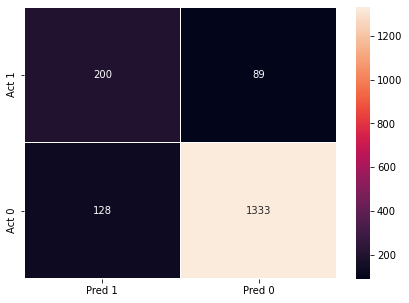

In [17]:
cm1 = confusion_matrix(y_test,prediksi1,labels=[1,0])
df_cm1 = pd.DataFrame(cm1,columns=['Pred 1', 'Pred 0'],index=['Act 1', 'Act 0'])

plt.figure(figsize=(7,5))
x = sns.heatmap(df_cm1, annot=True,annot_kws={'size':10},fmt='d',linewidths=0.2)
x.set_ylim(2,0)
plt.show()

Dalam model ini, yang menjadi tujuan adalah memprediksi intensi calon customer apakah calon customer tersebut akan berbelanja atau tidak. Oleh karena itu pemodelan yang dianggap baik adalah pemodelan yang bisa memberikan nilai True Positive sebanyak-banyaknya dan berdasarkan tujuan awal dari model ini untuk dapat membantu meningkatkan penjualan dari ecommerce saya memilih untuk memperbesar False Negative karena ketika mesin mempredict seorang calon customer yang akan berbelanja tetapi mesin tersebut akan mempredict tidak belanja kerugian yang didapat akan lebih besar dibandingkan dengan mesin mempredict banyak calon customer yang akan berbelanja padahal tidak. 

#### Logistic Regression Hyper Parameter Tuning

In [18]:
params1 = {
    "penalty":['l2'], # default l2, l1 dan elasticnet tidak dipakai karena menyebabkan solver 'newton-cg' error
    "solver":['liblinear','newton-cg','sag','saga','lbfgs'], # default liblinear
    "C":[0.1,0.5,1],
    "max_iter":[100,200,300,400,500,600,700,800,900,1000]
          }

In [19]:
model1_tuning = GridSearchCV(logres, params1, cv=10, n_jobs=-1, verbose=1)
model4 = model1_tuning.fit(X_train_sm,y_train_sm)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  3.9min finished
C:\Users\G531\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [20]:
model4.score(X_test,y_test)

0.88

In [21]:
model4.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}

In [22]:
prediksi4 = model4.predict(X_test)

In [69]:
print(classification_report(y_test, prediksi4))
cm = confusion_matrix(y_test,prediksi4,labels=[1,0])
print(cm)

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1461
           1       0.61      0.78      0.68       289

    accuracy                           0.88      1750
   macro avg       0.78      0.84      0.80      1750
weighted avg       0.90      0.88      0.89      1750

[[ 224   65]
 [ 145 1316]]


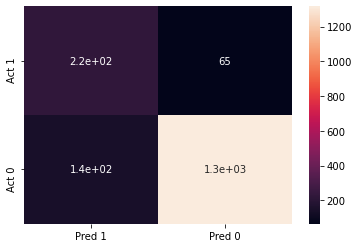

In [24]:
cm4 = confusion_matrix(y_test,prediksi4,labels=[1,0])
df_cm4 = pd.DataFrame(cm4,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
sns.heatmap(df_cm4,annot=True )

#### Random Forest

In [25]:
rfc = RandomForestClassifier(n_estimators=100) # n_estimator default
model2 = rfc.fit(X_train_sm,y_train_sm)

In [26]:
model2.score(X_test,y_test)

0.8891428571428571

In [27]:
prediksi2 = rfc.predict(X_test)

In [68]:
print(classification_report(y_test, prediksi2))
cm = confusion_matrix(y_test,prediksi2,labels=[1,0])
print(cm)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1461
           1       0.66      0.69      0.67       289

    accuracy                           0.89      1750
   macro avg       0.80      0.81      0.80      1750
weighted avg       0.89      0.89      0.89      1750

[[ 198   91]
 [ 103 1358]]


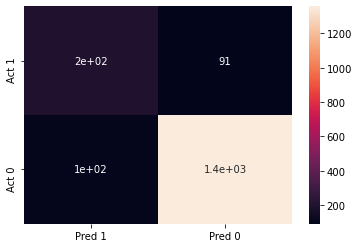

In [29]:
cm2 = confusion_matrix(y_test, prediksi2, labels=[1, 0])
df_cm2 = pd.DataFrame(cm2,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
df_cm2
sns.heatmap(df_cm2,annot=True )

#### Random Forest + Hyperparameter Tuning

In [30]:
params2 = {
    "n_estimators": [10,100,200], # default 10
     "max_features":['auto','sqrt'], # default auto 
    "max_depth":[int(x) for x in np.linspace(10,110,11)], # default none
     "min_samples_split":[2,5,10], # default 2 
     "min_samples_leaf":[1,2,4], # default 1
    "bootstrap":[True,False] 
          }

In [31]:
model2_tuning = GridSearchCV(rfc, params2, cv=5, n_jobs=-1, verbose=1)
model5 = model2_tuning.fit(X_train_sm,y_train_sm)

Fitting 5 folds for each of 792 candidates, totalling 3960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 3960 out of 3960 | elapsed: 10.7min finished


In [32]:
model5.score(X_test,y_test)

0.8891428571428571

In [33]:
model5.best_params_

{'bootstrap': False,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [34]:
prediksi5 = model5.predict(X_test)

In [67]:
print(classification_report(y_test, prediksi5))
cm = confusion_matrix(y_test,prediksi5,labels=[1,0])
print(cm)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1461
           1       0.67      0.65      0.66       289

    accuracy                           0.89      1750
   macro avg       0.80      0.79      0.80      1750
weighted avg       0.89      0.89      0.89      1750

[[ 188  101]
 [  93 1368]]


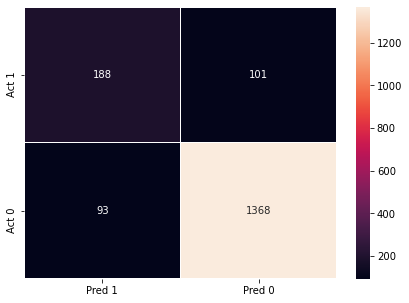

In [36]:
cm5 = confusion_matrix(y_test,prediksi5,labels=[1,0])
df_cm5 = pd.DataFrame(cm5,columns=['Pred 1', 'Pred 0'],index=['Act 1', 'Act 0'])

plt.figure(figsize=(7,5))
x = sns.heatmap(df_cm5, annot=True,annot_kws={'size':10},fmt='d',linewidths=0.2)
x.set_ylim(2,0)
plt.show()

#### XGBoost Classifier

In [37]:
xgbc = XGBClassifier()
model3 = xgbc.fit(X_train_sm,y_train_sm)

In [38]:
model3.score(X_test,y_test)

0.896

In [39]:
prediksi3 = xgbc.predict(X_test)

In [40]:
print(classification_report(y_test, prediksi3))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1461
           1       0.70      0.65      0.67       289

    accuracy                           0.90      1750
   macro avg       0.81      0.80      0.81      1750
weighted avg       0.89      0.90      0.89      1750



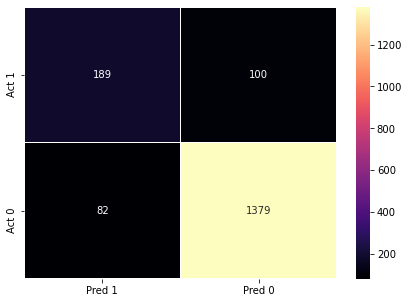

In [41]:
cm3 = confusion_matrix(y_test,prediksi3,labels=[1,0])
df_cm3 = pd.DataFrame(cm3,columns=['Pred 1', 'Pred 0'],index=['Act 1', 'Act 0'])

plt.figure(figsize=(7,5))
x = sns.heatmap(df_cm3, annot=True,annot_kws={'size':10},fmt='d',linewidths=0.2,cmap='magma')
x.set_ylim(2,0)
plt.show()

#### XGBoost Classifier Tunning

In [42]:
XGBClassifier()
params3 = {
    "learing_rate":[0.1,0.2,0.3], # default 0.1
    "max_depth":[3,5,7],# default 3
    "min_child_weight":[1,2], # default 1
    "gamma":[0.1,0.5], # default 0.1
    "subsample":[0.1,0.5], # default 0.1
    "reg_alpha":[0,1] # default 0
          }

In [43]:
model3_tuning = GridSearchCV(xgbc, params3, cv=5, n_jobs=-1, verbose=1)
model6 = model3_tuning.fit(X_train_sm,y_train_sm)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  2.4min finished


[19:40:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { learing_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [44]:
model6.score(X_test,y_test)

0.8942857142857142

In [45]:
model6.best_params_

{'gamma': 0.1,
 'learing_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 1,
 'reg_alpha': 1,
 'subsample': 0.5}

In [46]:
prediksi6 = model6.predict(X_test)

In [59]:
print(classification_report(y_test, prediksi6))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1461
           1       0.70      0.63      0.66       289

    accuracy                           0.89      1750
   macro avg       0.81      0.79      0.80      1750
weighted avg       0.89      0.89      0.89      1750



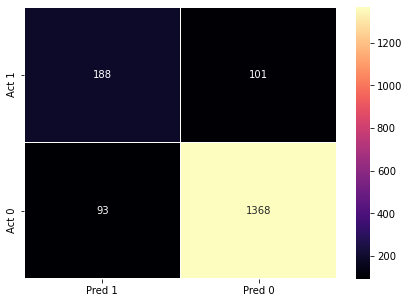

In [48]:
cm6 = confusion_matrix(y_test,prediksi5,labels=[1,0])
df_cm6 = pd.DataFrame(cm6,columns=['Pred 1', 'Pred 0'],index=['Act 1', 'Act 0'])

plt.figure(figsize=(7,5))
x = sns.heatmap(df_cm6, annot=True,annot_kws={'size':10},fmt='d',linewidths=0.2,cmap='magma')
x.set_ylim(2,0)
plt.show()

In [95]:
model5.predict([[1.0,1.0,1.0,1.0,10.0,627.500000,0.020000,0.050000,0.0,1.0,0,3,3,1,4,1,0]])[0]

0

#### ROC and AUC

In [49]:
proba1 = model1.predict_proba(X_test)
proba2 = model2.predict_proba(X_test)
proba3 = model3.predict_proba(X_test)
proba4 = model4.predict_proba(X_test)
proba5 = model5.predict_proba(X_test)
proba6 = model6.predict_proba(X_test)

In [50]:
pred1 = proba1[:,1] 
fpr1, tpr1, threshold1 = roc_curve(y_test, pred1)

pred2 = proba2[:,1] 
fpr2, tpr2, threshold2 = roc_curve(y_test, pred2)

pred3 = proba3[:,1] 
fpr3, tpr3, threshold3 = roc_curve(y_test, pred3)

pred4 = proba4[:,1] 
fpr4, tpr4, threshold4 = roc_curve(y_test, pred4)

pred5 = proba5[:,1] 
fpr5, tpr5, threshold5 = roc_curve(y_test, pred5)

pred6 = proba6[:,1] 
fpr6, tpr6, threshold6 = roc_curve(y_test, pred6)

In [51]:
sc1 = round(auc(fpr1,tpr1),2)
sc2 = round(auc(fpr2,tpr2),2)
sc3 = round(auc(fpr3,tpr3),2)
sc4 = round(auc(fpr4,tpr4),2)
sc5 = round(auc(fpr5,tpr5),2)
sc6 = round(auc(fpr6,tpr6),2)

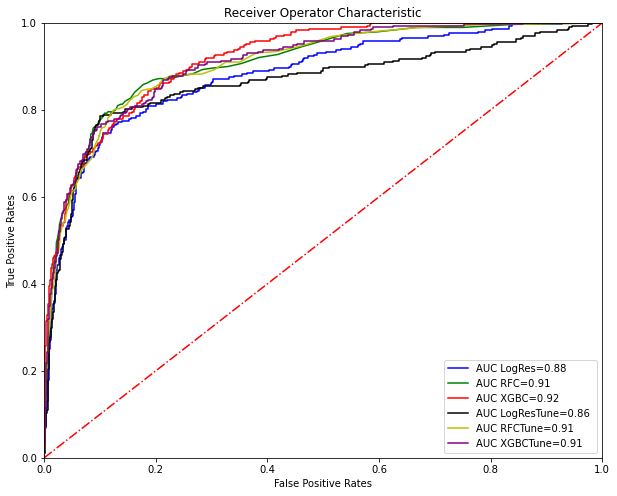

In [52]:
plt.figure(figsize=(10,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr1, tpr1, 'b', label=f'AUC LogRes={sc1} ')
plt.plot(fpr2, tpr2, 'g', label=f'AUC RFC={sc2} ')
plt.plot(fpr3, tpr3, 'r', label=f'AUC XGBC={sc3} ')
plt.plot(fpr4, tpr4, 'k', label=f'AUC LogResTune={sc4} ')
plt.plot(fpr5, tpr5, 'y', label=f'AUC RFCTune={sc5} ')
plt.plot(fpr6, tpr6, 'purple', label=f'AUC XGBCTune={sc6} ')

plt.plot([0,1],[0,1],'r-.')

plt.ylim([0,1]) # dizoom grafiknya dari 0.1
plt.xlim([0,1])
plt.legend()
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.show()